In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib import patches
import mplhep as hep
import os
from tqdm import tqdm
import ipywidgets as widget
import xsec

Welcome to JupyROOT 6.26/04


In [2]:
era = "2017"
rPathABCDNN = "root://cmseos.fnal.gov///store/user/dsunyou/"
rPath = "root://brux30.hep.brown.edu:1094//store/user/dali/"
rDir = rPath + "FWLJMET106XUL_singleLep{}UL_RunIISummer20_3t_step3/nominal/".format( era )
rDirABCDNN = rPath + "FWLJMET106XUL_singleLep{}UL_RunIISummer20_3t_step3_ABCDnn/nominal/".format( era )
nTree = "ljmet"
lumitext = {
    "2016APV": "19.52",
    "2016": "16.80",
    "2017": "41.48",
    "2018": "59.83"
}
fDAT = [
    "SingleElectron_hadd.root",
    "SingleMuon_hadd.root"
]
fBKG = [
    "ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root",
    "ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root",
    "ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "TTTT_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "TTHH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTWH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTWW_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTWZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTZH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTZZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "TTWJetsToQQ_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root", 
    "TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root",
    "TTZToLL_M-1to10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "ttHToNonbb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "WW_TuneCP5_13TeV-pythia8_hadd.root",
    "WZ_TuneCP5_13TeV-pythia8_hadd.root",
    "ZZ_TuneCP5_13TeV-pythia8_hadd.root",
    "DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
    "DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
    "DYJetsToLL_M-50_HT-600to800_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
    "DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
    "DYJetsToLL_M-50_HT-1200to2500_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
    "DYJetsToLL_M-50_HT-2500toInf_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8_hadd.root",
    #"QCD_HT200to300_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    #"QCD_HT300to500_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    #"QCD_HT500to700_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    "QCD_HT700to1000_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    "QCD_HT1000to1500_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    "QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    "QCD_HT2000toInf_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root",
    "WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
    "WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
    "WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
    "WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
    "WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",
    "WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_hadd.root",   
]
fABCDNN = [
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt1b_ABCDnn_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt2b_ABCDnn_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttbb_ABCDnn_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttcc_ABCDnn_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttjj_ABCDnn_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt1b_ABCDnn_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt2b_ABCDnn_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttbb_ABCDnn_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttcc_ABCDnn_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttjj_ABCDnn_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt1b_ABCDnn_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt2b_ABCDnn_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttbb_ABCDnn_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttcc_ABCDnn_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttjj_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt1b_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt2b_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttbb_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttcc_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_1_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_2_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_3_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_4_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_5_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_6_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_7_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_8_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_9_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_10_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt1b_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt2b_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttbb_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttcc_ABCDnn_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttjj_ABCDnn_hadd.root",
]

In [3]:
ROOT.gInterpreter.Declare("""
float compute_weight( float norm, float triggerXSF, float triggerSF, float pileupWeight, float pileupJetIDWeight, float lepIdSF, float isoSF, float L1NonPrefiringProb_CommonCalc, float MCWeight_MultiLepCalc, float tthfWeight, float btagDeepJetWeight, float btagDeepJet2DWeight_HTnj ){
    return norm * triggerXSF * triggerSF * pileupWeight * pileupJetIDWeight * lepIdSF * isoSF * L1NonPrefiringProb_CommonCalc * ( MCWeight_MultiLepCalc / abs( MCWeight_MultiLepCalc ) ) * tthfWeight * btagDeepJetWeight * btagDeepJet2DWeight_HTnj;
}
""")

True

In [4]:
ROOT.gInterpreter.Declare("""
float compute_weight_ttbar( float norm, float triggerXSF, float triggerSF, float pileupWeight, float pileupJetIDWeight, float topPtWeight13TeV, float lepIdSF, float isoSF, float L1NonPrefiringProb_CommonCalc, float MCWeight_MultiLepCalc, float tthfWeight, float btagDeepJetWeight, float btagDeepJet2DWeight_HTnj ){
    return norm * triggerXSF * triggerSF * pileupWeight * pileupJetIDWeight * topPtWeight13TeV * lepIdSF * isoSF * L1NonPrefiringProb_CommonCalc * ( MCWeight_MultiLepCalc / abs( MCWeight_MultiLepCalc ) ) * tthfWeight * btagDeepJetWeight * btagDeepJet2DWeight_HTnj;
}
""")

True

In [5]:
df_dat = {}
var_dat = [
    #"AK4HT",
    "thirdcsvb_bb",
    "DNN_1to40_3t",
    "NJets_JetSubCalc",
    "NJetsCSV_JetSubCalc",
    "corr_met_MultiLepCalc"
]

for file in tqdm( fDAT ):
    rDF = ROOT.RDataFrame( "ljmet", rDir + file )
    fDF = rDF.Filter( "minDR_lepJet > 0.4" ).Filter( "DataPastTriggerX == 1 && MCPastTriggerX == 1" )
    df_dat[file] = fDF.AsNumpy( columns = var_dat )

100%|██████████| 2/2 [00:08<00:00,  4.32s/it]


In [6]:
df_bkg = {}
var_bkg = var_dat + [
    "weight"
]

for file in tqdm( fBKG ):
    rDF = ROOT.RDataFrame( "ljmet", rDir + file )
    fDF = rDF.Filter( "minDR_lepJet > 0.4" ).Filter( "DataPastTriggerX == 1 && MCPastTriggerX == 1" )
    wDF = fDF.Define( "weight", "compute_weight( {}, triggerXSF, triggerSF, pileupWeight, pileupJetIDWeight, lepIdSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, tthfWeight, btagDeepJetWeight, btagDeepJet2DWeight_HTnj )".format( xsec.norm[file]) )
    df_bkg[file] = wDF.AsNumpy( columns = var_bkg )

100%|██████████| 37/37 [02:26<00:00,  3.95s/it]


In [7]:
df_abcdnn = {}
var_abcdnn = var_bkg + [
    "DNN_1to40_3t_nJ5pnB2p",
    "thirdcsvb_bb_nJ5pnB2p",
]

for file in tqdm( fABCDNN ):
    rDF = ROOT.RDataFrame( "ljmet", rDirABCDNN + file )
    fDF = rDF.Filter( "minDR_lepJet > 0.4" ).Filter( "DataPastTriggerX == 1 && MCPastTriggerX == 1" )
    wDF = fDF.Define( "weight", "compute_weight_ttbar( {}, triggerXSF, triggerSF, pileupWeight, pileupJetIDWeight, topPtWeight13TeV, lepIdSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, tthfWeight, btagDeepJetWeight, btagDeepJet2DWeight_HTnj )".format( xsec.norm[file.replace( "_ABCDnn", "" )] ) )
    df_abcdnn[file] = wDF.AsNumpy( columns = var_abcdnn )


100%|██████████| 34/34 [10:26<00:00, 18.43s/it]


In [8]:
varPlot = widget.Dropdown( options = var_dat )
varPlot

Dropdown(options=('thirdcsvb_bb', 'DNN_1to40_3t', 'NJets_JetSubCalc', 'NJetsCSV_JetSubCalc', 'corr_met_MultiLe…

In [9]:
def rel( sign, df, val ):
    if sign == "==":
        return df == val
    elif sign == ">=":
        return df >= val
    elif sign == ">":
        return df > val
    elif sign == "<=":
        return df <= val
    else:
        return df < val

In [10]:
abcdnn_tag = "nJ5pnB2p"
bins = np.linspace( 0., 1.0, 31 )
selection = {
    "DNN_1to40_3t": 0.0,
    "NJets_JetSubCalc": 5,
    "NJetsCSV_JetSubCalc": 2
}

sNJ = ">="
sNB = ">="

hist_dat = {}
hist_mc = {}
hist_abcdnn = {}
hist_sf = {}
sf = {}

print("[START] Filtering data")
for file in tqdm(fDAT):
    mask = ( rel( sNJ, df_dat[file]["NJets_JetSubCalc"], selection["NJets_JetSubCalc"] ) ) & ( rel( sNB, df_dat[file]["NJetsCSV_JetSubCalc"], selection["NJetsCSV_JetSubCalc"] ) )
    for var in selection:
        if var in [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc" ]: continue
        mask &= ( df_dat[file][var] > selection[var] )
    hist_dat[file] = df_dat[file][varPlot.value][mask]
        
print("[START] Filtering MC not used in ABCDnn")
for file in tqdm(fBKG):
    if file in [ "QCD_HT200to300_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root", "QCD_HT300to500_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root", "QCD_HT500to700_TuneCP5_PSWeights_13TeV-madgraph-pythia8_hadd.root" ]: continue
    mask = ( rel( sNJ, df_bkg[file]["NJets_JetSubCalc"], selection["NJets_JetSubCalc"] ) ) & ( rel( sNB, df_bkg[file]["NJetsCSV_JetSubCalc"], selection["NJetsCSV_JetSubCalc"] ) )
    for var in selection:
        if var in [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc" ]: continue
        mask &= ( df_bkg[file][var] > selection[var] )
    #hist_mc[file] = df_bkg[file][varPlot.value][mask]
    hist_sf[file] = df_bkg[file][varPlot.value][mask]
    sf[file]      = df_bkg[file]["weight"][mask]  

print("[START] Filtering MC used in ABCDnn")
for file in tqdm(fABCDNN):
    mask = ( rel( sNJ, df_abcdnn[file]["NJets_JetSubCalc"], selection["NJets_JetSubCalc"] ) ) & ( rel( sNB, df_abcdnn[file]["NJetsCSV_JetSubCalc"], selection["NJetsCSV_JetSubCalc"] ) )
    for var in selection:
        if var in [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc" ]: continue
        mask &= ( df_abcdnn[file][var] > selection[var] )
    hist_mc[file] = df_abcdnn[file][varPlot.value][mask]
    hist_sf[file] = df_abcdnn[file][varPlot.value][mask]
    sf[file]      = df_abcdnn[file]["weight"][mask]    
    hist_abcdnn[file] = df_abcdnn[file][varPlot.value+"_"+abcdnn_tag][mask]

[START] Filtering data


100%|██████████| 2/2 [00:00<00:00, 115.64it/s]


[START] Filtering MC not used in ABCDnn


100%|██████████| 37/37 [00:00<00:00, 144.28it/s]


[START] Filtering MC used in ABCDnn


100%|██████████| 34/34 [00:01<00:00, 24.18it/s] 


In [11]:
hist_dat["TOTAL"] = np.concatenate( [ hist_dat[file] for file in hist_dat ], axis = 0 )
hist_mc["TOTAL"] = np.concatenate( [ hist_mc[file] for file in hist_mc ], axis = 0 )
hist_sf["TOTAL"] = np.concatenate( [ hist_sf[file] for file in hist_sf ], axis = 0 )
sf["TOTAL"] = np.concatenate( [ sf[file] for file in sf ], axis = 0 )
hist_abcdnn["TOTAL"] = np.concatenate( [ hist_abcdnn[file] for file in hist_abcdnn ], axis = 0 )

In [12]:
plot_dat    = np.histogram( hist_dat["TOTAL"], bins = bins, density = True )
plot_mc     = np.histogram( hist_mc["TOTAL"], bins = bins, density = True )
plot_sf     = np.histogram( hist_sf["TOTAL"], bins = bins, weights = sf["TOTAL"], density = True )
plot_abcdnn = np.histogram( hist_abcdnn["TOTAL"], bins = bins, density = True )

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


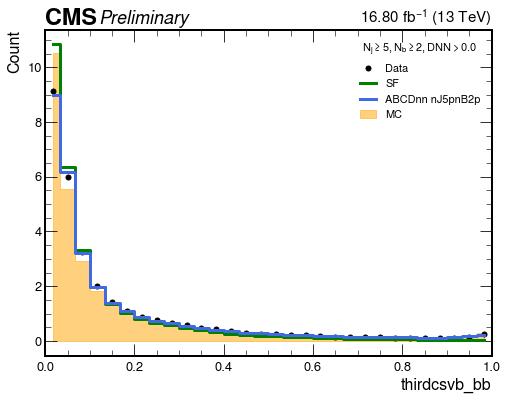

In [13]:
plotData = True
plt.figure( figsize = (8,6) )
plt.style.use( hep.style.CMS )
hep.cms.text( "Preliminary", fontsize = 18 )
hep.cms.lumitext( format( lumitext["2016"] ) + r"$\ fb^{-1}\ (13\ TeV)$", fontsize = 16 )

plt.fill_between(
    0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_mc[0] ), label = "MC",
    interpolate = False, step = "mid", color = "orange", alpha = 0.5
)
if plotData:
    plt.plot(
        0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_dat[0] ), label = "Data",
        ls = "", marker = "o", color = "black", ms = 5
    )
plt.plot(
    0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_sf[0] ), label = "SF",
    ls = "-", drawstyle = "steps-mid", color = "green", lw = 3
)
plt.plot(
    0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_abcdnn[0] ), label = "ABCDnn {}".format( abcdnn_tag ),
    ls = "-", drawstyle = "steps-mid", color = "royalblue", lw = 3
)


plt.xlabel( varPlot.value, fontsize = 16 )
plt.xlim( bins[0], bins[-1] )
plt.ylabel( "Count", fontsize = 16 )
#plt.yscale("log")
plt.tick_params( labelsize = 13 )

lNJ = "=" if sNJ == "==" else "\geq"
lNB = "=" if sNB == "==" else "\geq"

plt.legend( 
    title = r"$N_j{}{},N_b{}{},DNN>{}$".format( lNJ, selection["NJets_JetSubCalc"], lNB, selection["NJetsCSV_JetSubCalc"], selection["DNN_1to40_3t"] ),
    loc = 1, fontsize = 11, title_fontsize = 11
)
plt.show()
plt.close()

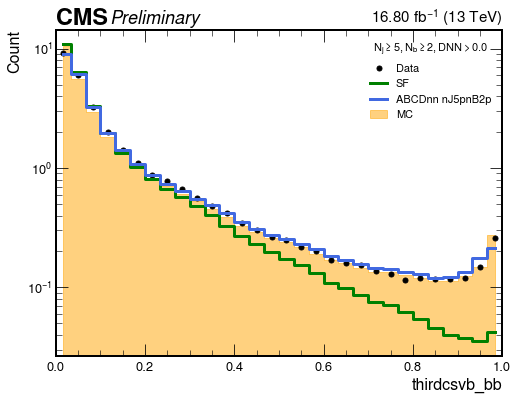

In [14]:
plt.figure( figsize = (8,6) )
plt.style.use( hep.style.CMS )
hep.cms.text( "Preliminary", fontsize = 18 )
hep.cms.lumitext( format( lumitext["2016"] ) + r"$\ fb^{-1}\ (13\ TeV)$", fontsize = 16 )

plt.fill_between(
    0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_mc[0] ), label = "MC",
    interpolate = False, step = "mid", color = "orange", alpha = 0.5
)
if plotData:
    plt.plot(
        0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_dat[0] ), label = "Data",
        ls = "", marker = "o", color = "black", ms = 5
    )
plt.plot(
    0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_sf[0] ), label = "SF",
    ls = "-", drawstyle = "steps-mid", color = "green", lw = 3
)
plt.plot(
    0.5 * ( bins[:-1] + bins[1:] ), np.nan_to_num( plot_abcdnn[0] ), label = "ABCDnn {}".format( abcdnn_tag ),
    ls = "-", drawstyle = "steps-mid", color = "royalblue", lw = 3
)


plt.xlabel( varPlot.value, fontsize = 16 )
plt.xlim( bins[0], bins[-1] )
plt.ylabel( "Count", fontsize = 16 )
plt.yscale("log")
plt.tick_params( labelsize = 13 )
lNJ = "=" if sNJ == "==" else "\geq"
lNB = "=" if sNB == "==" else "\geq"

plt.legend( 
    title = r"$N_j{}{},N_b{}{},DNN>{}$".format( lNJ, selection["NJets_JetSubCalc"], lNB, selection["NJetsCSV_JetSubCalc"], selection["DNN_1to40_3t"] ),
    loc = 1, fontsize = 11, title_fontsize = 11
)
plt.show()
plt.close()

## Template Binning Shape

In [56]:
nJ_cut = 6
nB_cut = 3

abcdnn_tags = [
    "nJ5pnB2p",
    "nJ6pnB2p",
    "nJ6pnB3p"
]

hist_dat = {}
hist_mc = {}
hist_abcdnn = {}
hist_sf = {}
sf = {}
        
for tag in abcdnn_tags:
    hist_mc[tag] = {}
    hist_abcdnn[tag] = {}
    hist_sf[tag] = {}
    sf[tag] = {}
    print( "[START] Filtering MC not used in ABCDnn {}".format( tag ) )
    for file in tqdm(fBKG):
        mask = ( df_bkg[file]["NJets_JetSubCalc"] >= nJ_cut ) & ( df_bkg[file]["NJetsCSV_JetSubCalc" ] >= nB_cut )
        for var in selection:
            if var in [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc" ]: continue
            mask &= ( df_bkg[file][var] > selection[var] )
        hist_mc[tag][file] = df_bkg[file][varPlot.value][mask]
        hist_sf[tag][file] = df_bkg[file][varPlot.value][mask]
        sf[tag][file]      = df_bkg[file]["weight"][mask]
        
    print("[START] Filtering MC used in ABCDnn {}".format( tag ) )
    for file in tqdm(fABCDNN):
        mask = ( df_abcdnn[file]["NJets_JetSubCalc"] >= nJ_cut ) & ( df_abcdnn[file]["NJetsCSV_JetSubCalc"] >= nB_cut )
        mask_abcdnn = ( df_abcdnn[file]["NJets_JetSubCalc"] >= nJ_cut ) & ( df_abcdnn[file]["NJetsCSV_JetSubCalc"] >= nB_cut )
        for var in selection:
            if var in [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc" ]: continue
            if var in [ "DNN_1to40_3t" ]:
                mask_abcdnn &= ( df_abcdnn[file][var+"_"+tag] > selection[var] )
            else:
                mask_abcdnn &= ( df_abcdnn[file][var] > selection[var] )
            mask &= ( df_abcdnn[file][var] > selection[var] )
        hist_mc[tag][file] = df_abcdnn[file][varPlot.value][mask]
        hist_sf[tag][file] = df_abcdnn[file][varPlot.value][mask]
        sf[tag][file]      = df_abcdnn[file]["weight"][mask]    
        hist_abcdnn[tag][file] = df_abcdnn[file][varPlot.value+"_"+tag][mask]

[START] Filtering MC not used in ABCDnn nJ5pnB2p


100%|██████████| 37/37 [00:00<00:00, 287.08it/s]


[START] Filtering MC used in ABCDnn nJ5pnB2p


100%|██████████| 34/34 [00:00<00:00, 101.79it/s]


[START] Filtering MC not used in ABCDnn nJ6pnB2p


100%|██████████| 37/37 [00:00<00:00, 291.76it/s]


[START] Filtering MC used in ABCDnn nJ6pnB2p


100%|██████████| 34/34 [00:00<00:00, 88.07it/s] 


[START] Filtering MC not used in ABCDnn nJ6pnB3p


100%|██████████| 37/37 [00:00<00:00, 257.55it/s]


[START] Filtering MC used in ABCDnn nJ6pnB3p


100%|██████████| 34/34 [00:00<00:00, 92.79it/s] 


In [57]:
for tag in abcdnn_tags:
    hist_mc[tag]["TOTAL"] = np.concatenate( [ hist_mc[tag][file] for file in hist_mc[tag] ], axis = 0 )
    hist_sf[tag]["TOTAL"] = np.concatenate( [ hist_sf[tag][file] for file in hist_sf[tag] ], axis = 0 )
    sf[tag]["TOTAL"] = np.concatenate( [ sf[tag][file] for file in sf[tag] ], axis = 0 )
    hist_abcdnn[tag]["TOTAL"] = np.concatenate( [ hist_abcdnn[tag][file] for file in hist_abcdnn[tag] ], axis = 0 )

In [58]:
plot_mc = {}
plot_sf = {}
plot_abcdnn = {}
for tag in abcdnn_tags:
    plot_mc[tag]     = np.histogram( hist_mc[tag]["TOTAL"], bins = bins, density = True )
    plot_sf[tag]     = np.histogram( hist_sf[tag]["TOTAL"], bins = bins, weights = sf[tag]["TOTAL"], density = True )
    plot_abcdnn[tag] = np.histogram( hist_abcdnn[tag]["TOTAL"], bins = bins, density = True )

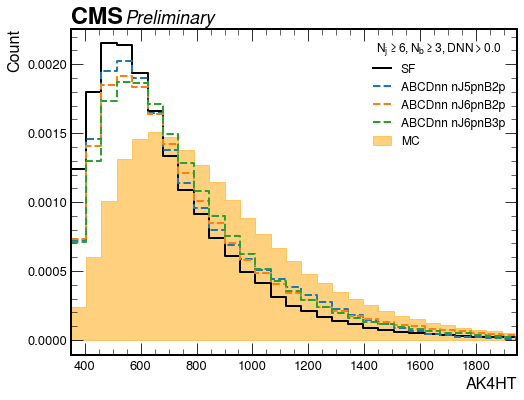

In [60]:
base_tag = "nJ6pnB3p"
plt.figure( figsize = (8,6) )
plt.style.use( hep.style.CMS )
hep.cms.text( "Preliminary", fontsize = 18 )

plt.fill_between(
    bins[:-1], np.nan_to_num( plot_mc[base_tag][0] ), label = "MC",
    interpolate = False, step = "post", color = "orange", alpha = 0.5
)

plt.plot(
    bins[:-1], np.nan_to_num( plot_sf[base_tag][0] ), label = "SF",
    ls = "-", drawstyle = "steps-post", color = "black", lw = 2
)

for tag in abcdnn_tags:
    plt.plot(
        bins[:-1], np.nan_to_num( plot_abcdnn[tag][0] ), label = "ABCDnn {}".format( tag ),
        ls = "--", drawstyle = "steps-post", lw = 2
    )


plt.xlabel( varPlot.value, fontsize = 16 )
plt.xlim( bins[0], bins[-2] )
plt.ylabel( "Count", fontsize = 16 )
#plt.yscale("log")
plt.tick_params( labelsize = 13 )
plt.legend( 
    title = r"$N_j\geq {},N_b\geq {},DNN>{}$".format( selection["NJets_JetSubCalc"], selection["NJetsCSV_JetSubCalc"], selection["DNN_1to40_3t"] ),
    loc = "best", fontsize = 12, title_fontsize = 12
)
plt.show()
plt.close()